- 16_Data.csv와 15_Data.csv 데이터를 결합해 아래와 같이 분석을 수행합니다. ( 두 데이터는 어느 한 정형외과에서 나온 척추 환자 디스크 수술 데이터)
- 15_Data.csv : 수술 후에 측정한 환자의 건강 상태 / 수술 실패여부 / 재발여부 데이터
- 16_Data.csv : 수술 이전에 환자로 부터 수집된 환자 신체정보 데이터

1. 15_Data.csv데이터와 16_Data.csv데이터를 가져와 "환자ID"를 기준으로 병합하여, df1 으로 선언하시오.
2. 환자 '성별'에 따라 '통증기간(월)', '헤모글로빈수치'의 평균의 차이가 있는지 검정 하시오.
3. 환자의 '신장'과 '체중'을 이용해 'BMI'수치를 계산하시오.
4. 환자의 '흡연여부'와 관련 있는 질병을 확인하고자 한다. '간질성폐질환', '고혈압여부', '당뇨여부', '말초동맥질환여부', '빈혈여부', '신부전여부','암발병여부','우울증여부', '종양진행여부', '혈전합병증여부' 항목들 중, 흡연 여부에 대해 유의미한 차이가 있는 질병을 가설 검정을 통해 찾으시오.
5. 환자의 '직업'중 가장 많은 직업은 어떤 직업이며, 해당 직업 군의 남/여 성비를 확인하시오.
6. 수술에 성공했으나, 재발한 환자들의 특성을 살펴보고자 한다. 해당 환자들의 평균연령과 평균 BMI, 남/여 성비의 비율과 직업군의 빈도수를 확인하시오.
7. 통증기간과 환자의 통증정도의 상관성이 있는지 가설검정을 수행하여 확인하고, 상관계수를 확인하시오.
8. 환자의 신장과 체중을 입력했을 때, BMI수치를 계산하고, 해당 연령대의 환자들의 성별에 따른 평균 헤모글로빈수치, 평균 환자통증정도를 시각화하여 출력하는 함수를 생성하시오.
9. 과거에 수술했던 환자들의 특성을 파악하고자 한다. 해당 환자들의 직업군과 성별의 빈도수를 확인하고, 해당 환자들 중 BMI수치가 높은 상위 5명의 환자 명단을 출력하여 recurs_patient.xlsx로 저장하시오.
10. 수술실패여부를 목표변수로 환자의 기본 특성을 입력했을 때, 해당 환자가 수술을 실패할 지/ 하지 않을지 분류모델을 만들고자 한다. 아래의 조건을 이용해 분류모델을 생성하시오.
- X값에는 환자의 기본 정보(신체적 정보 + 직업)와 질병력이 포함되어야 합니다.
- Y값은 "수술실패여부"
- DecisionTree Classifier를 이용해 학습을 수행하세요.
- 특성 공학 기법은 자유롭게 적용하여 모델을 구성해 주세요.
- **단 학습 데이터의 과적합이 발생하면 안되며, 학습 성능 F1 Score 기준 40%이상 나와야 합니다.
-** 학습한 모델은 model_medical.sav로 저장해 주세요.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df15 = pd.read_csv('실습 파일/15_Data.csv')
df16 = pd.read_csv('실습 파일/16_Data.csv')

In [3]:
# 1. 15_Data.csv데이터와 16_Data.csv데이터를 가져와 "환자ID"를 기준으로 병합하여, df1 으로 선언하시오.
df16.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '종양진행여부', '직업', '체중', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)',
       '입원일', '퇴원일'],
      dtype='object')

In [4]:
idx = list(set(df16.columns)-set(df15.columns))
idx.insert(0,'환자ID')
idx

['환자ID',
 'Location of herniation',
 'Large Lymphocyte',
 '심혈관질환',
 '우울증여부',
 '신부전여부',
 'ODI',
 '말초동맥질환여부',
 '빈혈여부',
 '입원기간',
 '종양진행여부',
 '고혈압여부',
 '직업',
 '당뇨여부',
 '성별',
 '스테로이드치료',
 '혈전합병증여부',
 '과거수술횟수',
 '흡연여부',
 '암발병여부',
 '간질성폐질환',
 '가족력']

In [5]:
df16 = df16.loc[:,idx]
df1 = pd.merge(df15, df16, on = '환자ID' )
del df1['Column 1']

In [6]:
df1

,환자ID,수술기법,수술시간,수술실패여부,신장,연령,재발여부,체중,헤모글로빈수치,환자통증정도,...,직업,당뇨여부,성별,스테로이드치료,혈전합병증여부,과거수술횟수,흡연여부,암발병여부,간질성폐질환,가족력
0,990PT,TELD,50.0,0,171,37,0,68.0,15.10,7,...,공무원,0,1,1,0,1,0,0,0,1.0
1,1020PT,TELD,55.0,0,162,27,0,57.0,13.10,8,...,교사,0,2,1,0,0,0,0,0,1.0
2,972PT,TELD,55.0,0,170,35,0,62.0,16.50,7,...,NaN,0,1,1,0,0,0,0,0,0.0
3,1052PT,TELD,30.0,0,174,34,0,75.0,15.10,7,...,사무직,0,1,0,0,0,1,0,0,0.0
4,1051PT,TELD,45.0,0,147,62,0,53.0,11.40,7,...,NaN,1,2,1,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,679PT,TELD,51.0,0,177,47,0,73.0,15.14,7,...,주부,0,1,1,0,0,1,0,0,0.0
1890,680PT,TELD,69.0,0,160,39,0,70.0,11.54,8,...,사무직,0,2,0,0,0,0,0,0,0.0
1891,915PT,TELD,79.0,0,177,38,1,86.0,13.17,7,...,사무직,0,1,1,0,0,1,0,0,0.0
1892,381PT,IELD,35.0,0,174,26,0,74.2,16.97,7,...,자영업,0,1,0,0,0,0,0,0,0.0


In [7]:
# 2. 환자 '성별'에 따라 '통증기간(월)', '헤모글로빈수치'의 평균의 차이가 있는지 검정 하시오.
import scipy.stats as stats

sample1 = df1[df1['성별']==1]['통증기간(월)'].dropna()
sample2 = df1[df1['성별']==2]['통증기간(월)'].dropna()
sample3 = df1[df1['성별']==1]['헤모글로빈수치'].dropna()
sample4 = df1[df1['성별']==2]['헤모글로빈수치'].dropna()

In [8]:
# 통증기간(월)의 대푯값 차이 검정

# 귀무가설 기각, 정규분포를 따르지 않는다
print(stats.normaltest(sample1),stats.normaltest(sample2))

# 귀무가설 기각, 두 그룹의 통증기간(월)의 대푯값은 동일하다고 볼 수 없다. 차이가 있다
stats.ranksums(sample1,sample2)

NormaltestResult(statistic=1973.5186287263045, pvalue=0.0) NormaltestResult(statistic=824.3852918801933, pvalue=9.705287099600454e-180)


RanksumsResult(statistic=-2.8632608163010476, pvalue=0.004193052551353649)

In [9]:
# 헤모글로빈수치의 대푯값 차이 검정

# 귀무가설 기각, 정규분포를 따르지 않는다
print(stats.normaltest(sample3),stats.normaltest(sample4))

# 귀무가설 기각, 두 그룹의 헤모글로빈수치의 대푯값은 동일하다고 볼 수 없다. 차이가 있다
stats.ranksums(sample3,sample4)

NormaltestResult(statistic=47.48934745656305, pvalue=4.8732559892711056e-11) NormaltestResult(statistic=20.948982718676493, pvalue=2.8247902262087444e-05)


RanksumsResult(statistic=15.835273255347058, pvalue=1.7768558733267522e-56)

In [10]:
# 3. 환자의 '신장'과 '체중'을 이용해 'BMI'수치를 계산하시오.
df1['BMI'] = df1['체중']/(df1['신장']/100)**2
df1['BMI']

0       23.255019
1       21.719250
2       21.453287
3       24.772097
4       24.526818
          ...    
1889    23.301095
1890    27.343750
1891    27.450605
1892    24.507861
1893    24.272431
Name: BMI, Length: 1894, dtype: float64

In [11]:
# 4. 환자의 '흡연여부'와 관련 있는 질병을 확인하고자 한다. 
#'간질성폐질환', '고혈압여부', '당뇨여부', '말초동맥질환여부','빈혈여부', '신부전여부'
#'암발병여부','우울증여부', '종양진행여부', '혈전합병증여부' 항목들 중, 
# 흡연 여부에 대해 유의미한 차이가 있는 질병을 가설 검정을 통해 찾으시오.
diagnosis = ['간질성폐질환', '고혈압여부', '당뇨여부', '말초동맥질환여부','빈혈여부'
             ,'신부전여부','암발병여부','우울증여부', '종양진행여부', '혈전합병증여부']

# 귀무가설 채택, 독립적이다.
cross = pd.crosstab(index = df1['흡연여부'], columns=df1['간질성폐질환'])
stats.chi2_contingency(cross)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[1453.24604013,   29.75395987],
       [ 402.75395987,    8.24604013]]))

In [12]:
box = []
# 연관성을 찾기 위해서는 귀무가설 기각, p값이 0.05보다 낮은 값을 찾아야함
for i in diagnosis:
    cross = pd.crosstab(index = df1['흡연여부'], columns=df1[i])
    value, p, d, freq = stats.chi2_contingency(cross)
    if p < 0.05:
        box.append(i)
        print(p, i)

0.006741012564106239 빈혈여부


In [13]:
# 5. 환자의 '직업'중 가장 많은 직업은 어떤 직업이며, 
df1.직업.value_counts().head(1)

직업
사무직    449
Name: count, dtype: int64

In [14]:
# 해당 직업 군의 남/여 성비를 확인하시오.
sample = df1[df1['직업']=='사무직']
pd.crosstab(index=sample['성별'] , columns ='성별', normalize=True)

col_0,성별
성별,
1,0.641425
2,0.358575


In [15]:
# 6. 수술에 성공했으나, 재발한 환자들의 특성을 살펴보고자 한다. 
# 해당 환자들의 평균연령과 평균 BMI, 남/여 성비의 비율과 직업군의 빈도수를 확인하시오.
df1.수술실패여부.value_counts()

수술실패여부
0    1779
1     115
Name: count, dtype: int64

In [16]:
df1.재발여부.value_counts()

재발여부
0    1667
1     227
Name: count, dtype: int64

In [17]:
sample = df1[(df1.수술실패여부==0)&(df1.재발여부==1)]
sample[['연령','BMI']].mean()

연령     43.725581
BMI    25.349856
dtype: float64

In [18]:
pd.crosstab(index=sample['성별'] , columns ='성별', normalize=True)

col_0,성별
성별,
1,0.67907
2,0.32093


In [19]:
pd.crosstab(index=sample['직업'] , columns ='직업')

col_0,직업
직업,
건설업,4
공무원,8
교사,6
군인,3
노동직,5
농업,4
무직,19
사무직,57
사업가,5


In [20]:
# 7. 통증기간과 환자의 통증정도의 상관성이 있는지 가설검정을 수행하여 확인하고, 상관계수를 확인하시오.
sample=df1[['통증기간(월)', '환자통증정도']].dropna()

# 귀무가설 기각, 정규성을 따르지 않는다
stats.normaltest(sample['통증기간(월)']),stats.normaltest(sample['환자통증정도'])

(NormaltestResult(statistic=3018.0450353176952, pvalue=0.0),
 NormaltestResult(statistic=431.99372374478617, pvalue=1.5622652776613988e-94))

In [21]:
# 귀무가설 채택, 상관성이 없다고 볼 수 있다
# 상관계수는 0에 가까움
stats.spearmanr(sample['통증기간(월)'],sample['환자통증정도'])

SignificanceResult(statistic=-0.010676647938840402, pvalue=0.6427450957438059)

In [22]:
# 8. 환자의 신장과 체중을 입력했을 때, BMI수치를 계산하고, 
# 연령대를 입력해야 함
df1.연령.describe()

count    1894.000000
mean       41.463569
std        13.444629
min        15.000000
25%        32.000000
50%        41.000000
75%        49.000000
max        86.000000
Name: 연령, dtype: float64

In [23]:
def age(x):
    if x<10:
        return "어린이"
    return str(x//10)+"0대"

df1['연령대'] = df1['연령'].apply(age)

In [24]:
# 해당 연령대의 환자들의 성별에 따른 평균 헤모글로빈수치, 평균 환자통증정도를 시각화하여 출력하는 함수
height = 170
weight = 70
BMI = weight/(height/100)**2

In [25]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
sample = df1[df1['연령대']=='40대'].pivot_table(index='성별',values=['헤모글로빈수치','환자통증정도']).reset_index()
sample1 = pd.melt(sample, id_vars='성별')
sample

,성별,헤모글로빈수치,환자통증정도
0,1,14.990847,6.904372
1,2,14.065116,6.841860


In [26]:
sample2

1       4.0
4       4.0
5       3.0
10      4.0
16      3.0
       ... 
1879    2.0
1880    1.0
1881    1.0
1886    1.0
1890    1.0
Name: 통증기간(월), Length: 725, dtype: float64

<Axes: xlabel='variable', ylabel='value'>

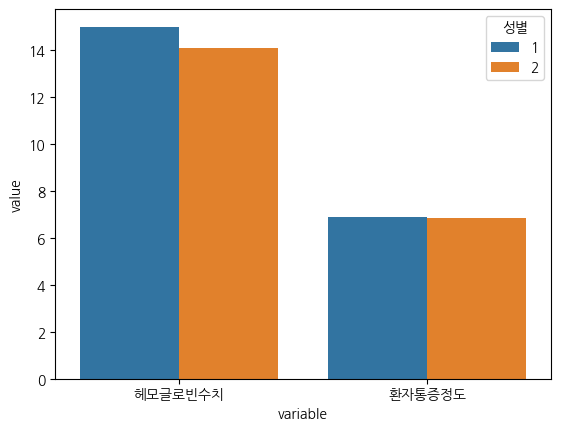

In [27]:
import seaborn as sns
sns.barplot(x = sample1['variable'], y=sample1['value'], hue = sample1['성별'])

['헤모글로빈수치' '환자통증정도']
[0. 1.]
[0.35 1.35]


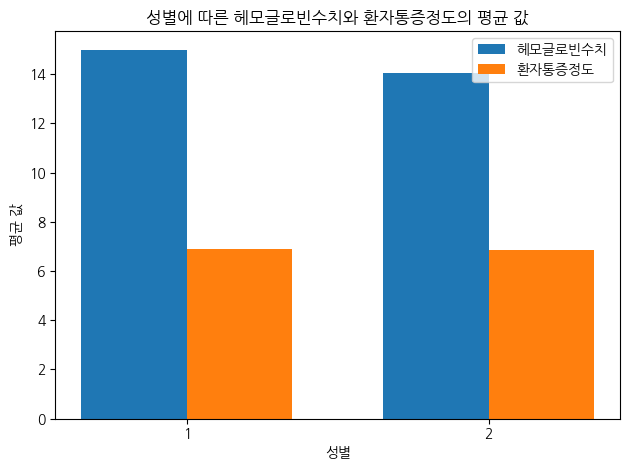

In [28]:
grouped = sample1.groupby(['성별', 'variable'])


labels = sample1['성별'].unique()
variables = sample1['variable'].unique()
width = 0.35
print(variables)
x = np.arange(len(labels))
fig, ax = plt.subplots()

for i, var in enumerate(variables):
    print(x + i * width)
    means = [grouped.get_group((label, var))['value'].mean() for label in labels]
    plt.bar(x + i * width, means, width, label=var)
    
ax.set_xlabel('성별')
ax.set_ylabel('평균 값')
ax.set_title('성별에 따른 헤모글로빈수치와 환자통증정도의 평균 값')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

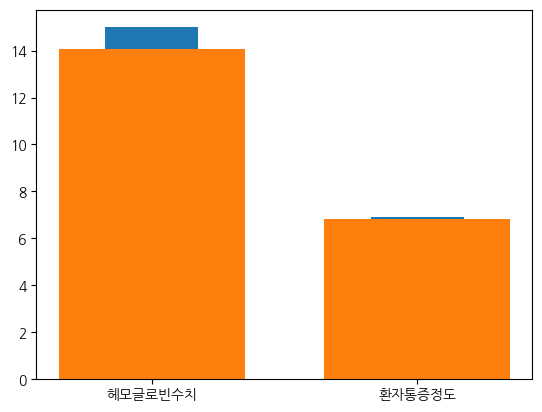

In [29]:
plt.figure() 
plt.bar(sample1[sample1['성별']==1]['variable'], sample1[sample1['성별']==1]['value'],width=0.35)
plt.bar(sample1[sample1['성별']==2]['variable'], sample1[sample1['성별']==2]['value'],width=0.70)
plt.show()

24.221453287197235


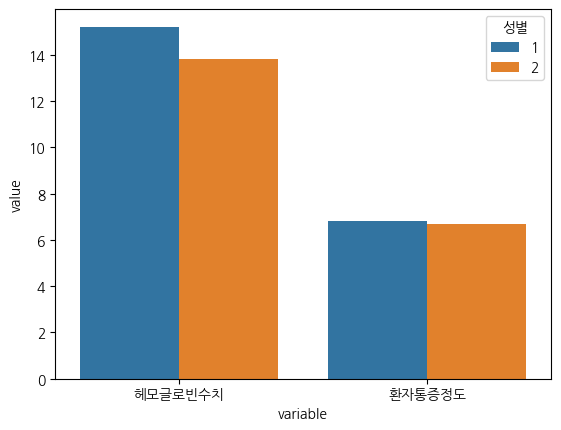

In [30]:
def make_plot(w,h,age):
    h = height
    w = weight
    BMI = weight/(height/100)**2
    print(BMI)
    
    sample = df1[df1['연령대']==age].pivot_table(index='성별',values=['헤모글로빈수치','환자통증정도']).reset_index()
    sample1 = pd.melt(sample, id_vars='성별')

    sns.barplot(x = sample1['variable'], y=sample1['value'], hue = sample1['성별'])

make_plot(50,170,'20대')

In [31]:
# 9. 과거에 수술했던 환자들의 특성을 파악하고자 한다. 
# 해당 환자들의 직업군과 성별의 빈도수를 확인하고, 
# 해당 환자들 중 BMI수치가 높은 상위 5명의 환자 명단을 출력하여 recurs_patient.xlsx로 저장하시오.
sample = df1[df1['과거수술횟수']>=1]
pd.crosstab(index=sample['직업'], columns=sample['성별'])

성별,1,2
직업,,
건설업,3,0
공무원,15,4
교사,2,3
군인,6,5
노동직,5,2
농업,8,0
무직,16,24
사무직,61,32
사업가,5,4


In [32]:
idx = sample[['BMI']].sort_values('BMI',ascending=False).head(5).index
idx

Index([831, 759, 786, 233, 462], dtype='int64')

In [33]:
ans = df1.iloc[idx,:]
ans.to_excel("생성 파일/recurs_patient.xlsx")

In [34]:
#10. 수술실패여부를 목표변수로 환자의 기본 특성을 입력했을 때, 
# 해당 환자가 수술을 실패할 지/ 하지 않을지 분류모델을 만들고자 한다. 
#아래의 조건을 이용해 분류모델을 생성하시오.
#- X값에는 환자의 기본 정보(신체적 정보 + 직업)와 질병력이 포함되어야 합니다.
#- Y값은 "수술실패여부"
#- DecisionTree Classifier를 이용해 학습을 수행하세요.
#- 특성 공학 기법은 자유롭게 적용하여 모델을 구성해 주세요.
#- **단 학습 데이터의 과적합이 발생하면 안되며, 학습 성능 F1 Score 기준 40%이상 나와야 합니다.
#-** 학습한 모델은 model_medical.sav로 저장해 주세요.

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report


In [36]:
sample2 = df1[['수술실패여부','신장','연령','체중','직업','당뇨여부','우울증여부','고혈압여부','신부전여부',
        '빈혈여부','간질성폐질환','Location of herniation','성별','심혈관질환','암발병여부',
        '말초동맥질환여부','혈전합병증여부','종양진행여부']].dropna()

sample = df1[['수술실패여부','신장','연령','체중','직업','당뇨여부','우울증여부','고혈압여부','신부전여부',
        '빈혈여부','간질성폐질환','Location of herniation','성별','심혈관질환','암발병여부',
        '말초동맥질환여부','혈전합병증여부','종양진행여부']]
sample['직업'] = sample['직업'].fillna('모름')
sample = sample.dropna()

C:\Users\campus2H018\AppData\Local\Temp\ipykernel_14540\457368363.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['직업'] = sample['직업'].fillna('모름')


In [37]:
X = sample[['신장','연령','체중','직업','당뇨여부','우울증여부','고혈압여부','신부전여부',
        '빈혈여부','간질성폐질환','Location of herniation','성별','심혈관질환','암발병여부',
        '말초동맥질환여부','혈전합병증여부','종양진행여부']]
y = sample['수술실패여부']


In [38]:
dummy_X = pd.get_dummies(X)
# encoder = LabelEncoder()
# X['직업'] = encoder.fit_transform(X['직업'])

In [39]:
from imblearn.combine import SMOTETomek

sampling_model = SMOTETomek()
X_resample, y_resample = sampling_model.fit_resample(dummy_X,y)

train_x, test_x, train_y, test_y = train_test_split(X_resample,y_resample, test_size = 0.25)

dt = DecisionTreeClassifier(max_depth=4,
      min_samples_split=2,
      min_samples_leaf=3)
dt.fit(train_x, train_y)

pred = dt.predict(test_x)
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       421
           1       0.76      0.74      0.75       459

    accuracy                           0.74       880
   macro avg       0.74      0.74      0.74       880
weighted avg       0.74      0.74      0.74       880



In [40]:
print(dt.score(train_x, train_y))

0.7606060606060606


In [41]:
print(dt.score(test_x, test_y))

0.7420454545454546


In [42]:
from sklearn.model_selection import GridSearchCV

dic = {"max_depth":[3,4,5],
      "min_samples_split":[2,3,4],
      "min_samples_leaf":[2,3,4]}

dt = DecisionTreeClassifier()

a = GridSearchCV(dt,dic,cv = 5, scoring='f1_macro')
a.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1_macro')

In [43]:
a.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}

In [44]:
model = a.best_estimator_

pred = model.predict(test_x)
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       421
           1       0.74      0.77      0.76       459

    accuracy                           0.74       880
   macro avg       0.74      0.74      0.74       880
weighted avg       0.74      0.74      0.74       880



In [45]:
print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

0.7742424242424243
0.7397727272727272


In [46]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

sample3 = df1[['수술기법', '성별', '연령', 'BMI', '헤모글로빈수치', '환자통증정도',
          '통증기간(월)', '혈액형', '직업', '흡연여부', '수술실패여부']].dropna()

X = sample3.iloc[:, :-1]
y = sample3['수술실패여부']

box = []
X['수술기법'] = encoder.fit_transform(X['수술기법'])
box.append(encoder.classes_)
X['혈액형'] = encoder.fit_transform(X['혈액형'])
box.append(encoder.classes_)
X['직업'] = encoder.fit_transform(X['직업'])
box.append(encoder.classes_)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek

model = SMOTETomek()
X,y = model.fit_resample(X,y)

X = X.to_numpy()
y = y.to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2)

dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)

DecisionTreeClassifier()

In [47]:
report = classification_report(test_y, dt.predict(test_x))
print(report)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       256
           1       0.87      0.93      0.90       270

    accuracy                           0.89       526
   macro avg       0.89      0.89      0.89       526
weighted avg       0.89      0.89      0.89       526



In [48]:
print(dt.score(train_x, train_y))
print(dt.score(test_x, test_y))

1.0
0.8916349809885932


In [50]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler


sample3 = df1[['수술기법', '성별', '연령', 'BMI', '헤모글로빈수치', '환자통증정도',
          '통증기간(월)', '혈액형', '직업', '흡연여부', '수술실패여부']].dropna()

X = df1.iloc[:, :-1]
y = df1['수술실패여부']

numeric_list = X.describe().columns
category_list = X.describe(include='object').columns

train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2)

# 수치형 데이터를 위한 파이프라인
numeric_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 범주형 데이터를 위한 파이프라인
category_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer 정의
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipe, numeric_list),
        ('cat', category_pipe, category_list)
    ]
)

# 최종 모델 파이프라인
model_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', RandomOverSampler()),
    ('classifier', DecisionTreeClassifier())
])

# 모델 학습
model_pipe.fit(train_x, train_y)

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'RandomOverSampler()' (type <class 'imblearn.over_sampling._random_over_sampler.RandomOverSampler'>) doesn't

In [ ]:
 model_pipe.fit(train_x, train_y)